# Proyek Analisis Data: E-commerce
- **Nama:** Keisha Kayana Aptadhea
- **Email:** mc015d5x2106@student.devacademy.id
- **ID Dicoding:** MC015D5X2106

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang paling sering dibeli oleh pelanggan?
- Apa kategori produk dengan rata-rata ulasan terbaik & terburuk?
- Bagaimana tingkat kepuasan pelanggan terhadap transaksi di e-commerce


## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np

## Data Wrangling

### Gathering Data

In [4]:
df_customers = pd.read_csv("/content/customers_dataset.csv")
df_geolocation = pd.read_csv("/content/geolocation_dataset.csv")
df_order_items = pd.read_csv("/content/order_items_dataset.csv")
df_order_payments = pd.read_csv("/content/order_payments_dataset.csv")
df_order_reviews = pd.read_csv("/content/order_reviews_dataset.csv")
df_orders = pd.read_csv("/content/orders_dataset.csv")
df_product_category = pd.read_csv("/content/product_category_name_translation.csv")
df_products = pd.read_csv("/content/products_dataset.csv")
df_sellers = pd.read_csv("/content/sellers_dataset.csv")



In [5]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
df_product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Dataset memuat 9 data dengan informasi masing-masing data yang saling berkaitan


### Assessing Data

In [14]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [15]:
print("Jumlah duplikasi data:", df_customers.duplicated().sum())

Jumlah duplikasi data: 0


In [16]:
df_customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Tidak ada missing value dan duplikasi data

In [17]:
df_geolocation.info()
print("Jumlah duplikasi data:", df_geolocation.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413249 entries, 0 to 413248
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  413249 non-null  int64  
 1   geolocation_lat              413249 non-null  float64
 2   geolocation_lng              413249 non-null  float64
 3   geolocation_city             413249 non-null  object 
 4   geolocation_state            413248 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 15.8+ MB
Jumlah duplikasi data: 122951


In [18]:
df_geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,413249.000000,413249.000000,413249.000000
mean,9298.527169,-23.150110,-46.999932
std,5311.940509,0.839945,1.260591
min,1001.000000,-29.683911,-61.932123
25%,4718.000000,-23.605675,-47.087850
50%,8473.000000,-23.520030,-46.682711
75%,13485.000000,-22.930142,-46.540897
max,20561.000000,28.008978,-15.536867




*   Tidak ada missing value
*   Terdapat duplikasi data

In [19]:
df_order_items.info()
print("Jumlah duplikasi data:", df_order_items.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah duplikasi data: 0


In [20]:
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


*   Tidak ada missing value dan duplikasi data

*   Terdapat kesalahan tipe data, shipping_limit_date seharusnya bertipe datetime



In [21]:
df_order_payments.info()
print("Jumlah duplikasi data:", df_order_payments.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah duplikasi data: 0


In [22]:
df_order_payments.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Tidak ada missing value dan duplikasi data

In [23]:
df_order_reviews.info()
print("Jumlah duplikasi data:", df_order_reviews.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Jumlah duplikasi data: 0


In [24]:
df_order_reviews.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [25]:
df_order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


*   Terdapat missing value pada review_comment_title dan review_comment_message
*   Terdapat kesalahan tipe data di beberapa kolom



In [26]:
df_orders.info()
print("Jumlah duplikasi data:", df_orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah duplikasi data: 0


In [27]:
df_orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [28]:
df_orders.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


*   Terdapat beberapa kolom dengan kesalahan tipe data
*   Terdapat missing value
*   Tidak ada duplikasi data





In [29]:
df_product_category.info()
print("Jumlah duplikasi data:", df_product_category.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah duplikasi data: 0


In [30]:
df_product_category.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Tidak ada missing value dan duplikasi data

In [31]:
df_products.info()
print("Jumlah duplikasi data:", df_products.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi data: 0


In [32]:
df_products.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [33]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Terdapat missing value

In [34]:
df_sellers.info()
print("Jumlah duplikasi data:", df_sellers.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Jumlah duplikasi data: 0


Tidak ada missing value dan duplikasi data


**Insight**
*   Akan digunakan beberapa dataset yang diperlukan untuk menjawab pertanyaan bisnis diawal, yaitu customers, order_items, order_payments, order_reviews, orders, product_category dan products
*   Tipe data yang salah akan dikonversi menjadi tipe data yang sesuai
*   Missing values dan duplikasi data akan diperbaiki
*   Kolom yang tidak dibutuhkan akan didrop


### Cleaning Data

Cleaning data customers

In [35]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [36]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [37]:
df_customers.drop(['customer_unique_id', 'customer_zip_code_prefix', 'customer_state'], axis='columns', inplace=True)

In [38]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    99441 non-null  object
 1   customer_city  99441 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


Menghapus kolom yang tidak diperlukan

Cleaning data order_items

In [39]:
df_order_items.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [40]:
df_order_items.drop(['seller_id', 'shipping_limit_date', 'freight_value'], axis='columns', inplace=True)

In [41]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


Menghapus kolom yang tidak diperlukan

Cleaning data order payments

In [42]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [43]:
df_order_payments.drop(['payment_sequential', 'payment_type', 'payment_installments'], axis='columns', inplace=True)

In [44]:
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       103886 non-null  object 
 1   payment_value  103886 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.6+ MB


Menghapus kolom yang tidak diperlukan

Cleaning data order review


In [45]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [46]:
df_order_reviews.drop(['review_comment_title', 'review_creation_date', 'review_answer_timestamp'], axis='columns', inplace=True)

In [47]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_id               99224 non-null  object
 1   order_id                99224 non-null  object
 2   review_score            99224 non-null  int64 
 3   review_comment_message  40977 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [48]:
df_order_reviews[df_order_reviews['review_comment_message'].isna()].head(10)

,review_id,order_id,review_score,review_comment_message
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN
10,c9cfd2d5ab5911836ababae136c3a10c,cdf9aa68e72324eeb25c7de974696ee2,5,NaN
11,96052551d87e5f62e6c9f6974ec392e9,3d374c9e46530bb5ed4a7648915306a6,5,NaN
13,23f75a37effc35d9a915b4e1ad483793,2eaf8e099d871cd5c22b83b5ea8f6e0e,4,NaN


In [49]:
df_order_reviews['review_comment_message'].fillna('Tanpa Komentar', inplace=True)

<ipython-input-49-b47c9de86c73>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_order_reviews['review_comment_message'].fillna('Tanpa Komentar', inplace=True)


In [50]:
df_order_reviews.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_message,0


* Menghapus kolom yang tidak digunakan
* Mengisi missing values pada review_comment_message menjadi "tanpa komentar" karena sangat mungkin customer memberi rating tanpa komentar


Cleaning data orders

In [51]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [52]:
df_orders.drop(['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], axis='columns', inplace=True)

In [53]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  99441 non-null  object
 1   customer_id               99441 non-null  object
 2   order_status              99441 non-null  object
 3   order_purchase_timestamp  99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [54]:
datetime_columns = ["order_purchase_timestamp"]

for column in datetime_columns:
  df_orders[column] = pd.to_datetime(df_orders[column])

In [55]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ MB


* Menghapus kolom yang tidak digunakan
* Mengubah tipe data order_purchase_timestamp menjadi datetime


Cleaning data product category

In [56]:
df_product_category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


Cleaning data products

In [57]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [58]:
df_products.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis='columns', inplace=True)

In [59]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


In [60]:
df_products.dropna(inplace=True)

In [61]:
df_products.isna().sum()

,0
product_id,0
product_category_name,0


* Menghapus kolom yang tidak digunakan
* Menghapus missing values

## Exploratory Data Analysis (EDA)

### Merge data

In [62]:
merge1 = pd.merge(
    left = df_customers,
    right = df_orders,
    how = 'left',
    right_on = 'customer_id',
    left_on = 'customer_id'
)
merge1.head()

,customer_id,customer_city,order_id,order_status,order_purchase_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30


In [63]:
merge2 = pd.merge(
    left = merge1,
    right = df_order_items,
    how = 'left',
    right_on = 'order_id',
    left_on = 'order_id'
)
merge2.head()

,customer_id,customer_city,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,price
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1.0,4aa6014eceb682077f9dc4bffebc05b0,289.00
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1.0,bd07b66896d6f1494f5b86251848ced7,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1.0,9391a573abe00141c56e38d84d7d5b3b,230.00


In [64]:
merge3 = pd.merge(
    left = merge2,
    right = df_order_payments,
    how = 'left',
    right_on = 'order_id',
    left_on = 'order_id'
)
merge3.head()

,customer_id,customer_city,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,146.87
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1.0,4aa6014eceb682077f9dc4bffebc05b0,289.00,335.48
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1.0,bd07b66896d6f1494f5b86251848ced7,139.94,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1.0,9391a573abe00141c56e38d84d7d5b3b,230.00,252.25


In [65]:
merge4 = pd.merge(
    left = merge3,
    right = df_order_reviews,
    how = 'left',
    right_on = 'order_id',
    left_on = 'order_id'
)
merge4.head()

,customer_id,customer_city,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,payment_value,review_id,review_score,review_comment_message
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,Tanpa Komentar
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1.0,4aa6014eceb682077f9dc4bffebc05b0,289.00,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,Tanpa Komentar
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1.0,bd07b66896d6f1494f5b86251848ced7,139.94,157.73,5ad6695d76ee186dc473c42706984d87,5.0,Tanpa Komentar
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,Tanpa Komentar
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1.0,9391a573abe00141c56e38d84d7d5b3b,230.00,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,O baratheon è esxelente Amo adoro o baratheon


In [66]:
merge5 = pd.merge(
    left = merge4,
    right = df_products,
    how = 'left',
    right_on = 'product_id',
    left_on = 'product_id'
)
merge5.head()

,customer_id,customer_city,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,payment_value,review_id,review_score,review_comment_message,product_category_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,Tanpa Komentar,moveis_escritorio
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1.0,4aa6014eceb682077f9dc4bffebc05b0,289.00,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,Tanpa Komentar,utilidades_domesticas
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1.0,bd07b66896d6f1494f5b86251848ced7,139.94,157.73,5ad6695d76ee186dc473c42706984d87,5.0,Tanpa Komentar,moveis_escritorio
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,Tanpa Komentar,moveis_escritorio
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1.0,9391a573abe00141c56e38d84d7d5b3b,230.00,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,O baratheon è esxelente Amo adoro o baratheon,casa_conforto


In [67]:
df_merge = pd.merge(
    left = merge5,
    right = df_product_category,
    how = 'left',
    right_on = 'product_category_name',
    left_on = 'product_category_name'
)
df_merge.head()

,customer_id,customer_city,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,payment_value,review_id,review_score,review_comment_message,product_category_name,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,Tanpa Komentar,moveis_escritorio,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1.0,4aa6014eceb682077f9dc4bffebc05b0,289.00,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,Tanpa Komentar,utilidades_domesticas,housewares
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1.0,bd07b66896d6f1494f5b86251848ced7,139.94,157.73,5ad6695d76ee186dc473c42706984d87,5.0,Tanpa Komentar,moveis_escritorio,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,Tanpa Komentar,moveis_escritorio,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1.0,9391a573abe00141c56e38d84d7d5b3b,230.00,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,O baratheon è esxelente Amo adoro o baratheon,casa_conforto,home_confort


In [68]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_city                  119143 non-null  object        
 2   order_id                       119143 non-null  object        
 3   order_status                   119143 non-null  object        
 4   order_purchase_timestamp       119143 non-null  datetime64[ns]
 5   order_item_id                  118310 non-null  float64       
 6   product_id                     118310 non-null  object        
 7   price                          118310 non-null  float64       
 8   payment_value                  119140 non-null  float64       
 9   review_id                      118146 non-null  object        
 10  review_score                   118146 non-null  float64       
 11  

In [69]:
df_merge.isna().sum()

,0
customer_id,0
customer_city,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_item_id,833
product_id,833
price,833
payment_value,3
review_id,997


In [70]:
df_merge.dropna(inplace=True)
df_merge.isna().sum()

,0
customer_id,0
customer_city,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_item_id,0
product_id,0
price,0
payment_value,0
review_id,0


In [71]:
df_merge.duplicated().sum()

660

In [72]:
df_merge.drop_duplicates(inplace=True)
df_merge.duplicated().sum()

0

In [73]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114949 entries, 0 to 119142
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    114949 non-null  object        
 1   customer_city                  114949 non-null  object        
 2   order_id                       114949 non-null  object        
 3   order_status                   114949 non-null  object        
 4   order_purchase_timestamp       114949 non-null  datetime64[ns]
 5   order_item_id                  114949 non-null  float64       
 6   product_id                     114949 non-null  object        
 7   price                          114949 non-null  float64       
 8   payment_value                  114949 non-null  float64       
 9   review_id                      114949 non-null  object        
 10  review_score                   114949 non-null  float64       
 11  revie

In [74]:
df_merge.describe(include='all')

,customer_id,customer_city,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,payment_value,review_id,review_score,review_comment_message,product_category_name,product_category_name_english
count,114949,114949,114949,114949,114949,114949.000000,114949,114949.000000,114949.000000,114949,114949.000000,114949,114949,114949
unique,96516,4093,96516,7,NaN,NaN,32171,NaN,NaN,96319,NaN,35177,71,71
top,13aa59158da63ba0e93ec6ac2c07aacb,sao paulo,fedcd9f7ccdc8cba3a18defedd1a5547,delivered,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,NaN,NaN,7145a6f0d38ec713897856cbdcfcdb7f,NaN,Tanpa Komentar,cama_mesa_banho,bed_bath_table
freq,34,18124,34,112564,NaN,NaN,531,NaN,NaN,34,NaN,66310,11750,11750
mean,NaN,NaN,NaN,NaN,2017-12-31 08:08:49.709914880,1.194547,NaN,120.603446,173.185689,NaN,4.034363,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,1.000000,NaN,0.850000,0.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2017-09-12 16:18:47,1.000000,NaN,39.900000,61.580000,NaN,4.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2018-01-19 11:13:14,1.000000,NaN,74.900000,108.600000,NaN,5.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2018-05-04 16:56:24,1.000000,NaN,134.900000,190.180000,NaN,5.000000,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,2018-09-03 09:06:57,21.000000,NaN,6735.000000,13664.080000,NaN,5.000000,NaN,NaN,NaN


**Insight:**
- Jumlah transaksi adalah 114.949 pembelian dengan 96.516 pelanggan
- Kota Saou Paulo memiliki jumlah transaksi paling tinggi yaitu 18.124 transaksi
- Kategori produk yang paling sering dipesan adalah bed_bath_table denga total 11.750 transaksi
- Rata-rata biaya pengiriman 20,049 BRL dengan ongkos kirim terbesar 509,68 BRL dan trkecil adalah 0
- Rata-rata dari nilai review adalah 4,034, dengan nilai minimum 1.
- Mayoritas review hanya memberikan nilai, tanpa komentar. Ada 67.323 review tanpa komentar

In [75]:
df_merge.head()

,customer_id,customer_city,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,payment_value,review_id,review_score,review_comment_message,product_category_name,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,Tanpa Komentar,moveis_escritorio,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1.0,4aa6014eceb682077f9dc4bffebc05b0,289.00,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,Tanpa Komentar,utilidades_domesticas,housewares
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1.0,bd07b66896d6f1494f5b86251848ced7,139.94,157.73,5ad6695d76ee186dc473c42706984d87,5.0,Tanpa Komentar,moveis_escritorio,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,Tanpa Komentar,moveis_escritorio,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1.0,9391a573abe00141c56e38d84d7d5b3b,230.00,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,O baratheon è esxelente Amo adoro o baratheon,casa_conforto,home_confort


### Eksplorasi kategori produk

In [76]:
top_products = (
    df_merge.groupby('product_category_name_english')
    .agg(
        total_sold=('order_id', 'size'),  # Hitung total transaksi per produk
        avg_price=('price', 'mean'),       # Rata-rata harga produk
    )
    .sort_values(by='total_sold', ascending=False)
    .reset_index()
    .nlargest(10, 'total_sold')
)

top_products.head()

,product_category_name_english,total_sold,avg_price
0,bed_bath_table,11750,92.797917
1,health_beauty,9889,129.840121
2,sports_leisure,8887,114.436112
3,furniture_decor,8700,87.516929
4,computers_accessories,8093,116.461577


In [77]:
categories = top_products['product_category_name_english'].tolist()
category_name = categories[0]

df_merge['order_purchase_month'] = pd.to_datetime(df_merge['order_purchase_timestamp']).dt.to_period('M')

trend = df_merge[df_merge['product_category_name_english'] == category_name] \
    .groupby('order_purchase_month')['order_id'].size()



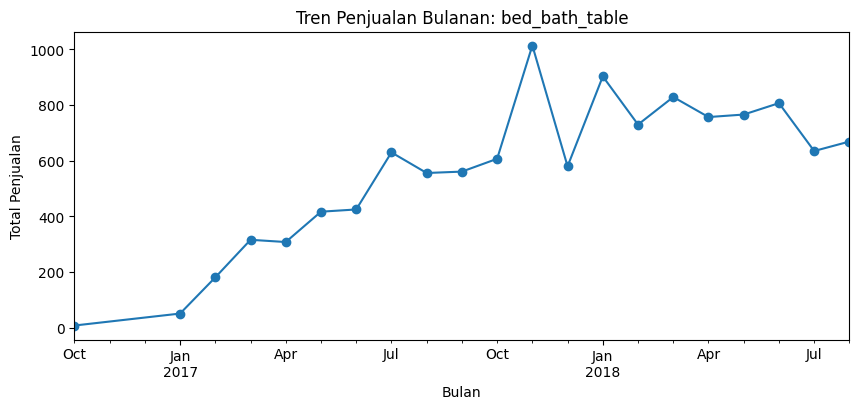

In [78]:
trend.plot(figsize=(10, 4), marker='o', title=f'Tren Penjualan Bulanan: {category_name}')
plt.ylabel('Total Penjualan')
plt.xlabel('Bulan')
plt.show()

In [79]:
review_avg = df_merge.groupby('product_category_name_english')['review_score'].mean().sort_values()
review_avg_df = review_avg.reset_index()

print("Top 10 Produk dengan Review Tertinggi:")
print(review_avg_df.tail(10))
print("\nTop 10 Produk dengan Review Terendah:")
print(review_avg_df.head(10))

Top 10 Produk dengan Review Tertinggi:
            product_category_name_english  review_score
61                    luggage_accessories      4.296167
62                             food_drink      4.319444
63  small_appliances_home_oven_and_coffee      4.320513
64                        books_technical      4.375465
65                costruction_tools_tools      4.415842
66                         books_imported      4.419355
67                                flowers      4.419355
68                 books_general_interest      4.438503
69              fashion_childrens_clothes      4.500000
70                      cds_dvds_musicals      4.642857

Top 10 Produk dengan Review Terendah:
       product_category_name_english  review_score
0              security_and_services      2.500000
1                diapers_and_hygiene      3.256410
2                   office_furniture      3.518771
3              fashion_male_clothing      3.546099
4                     home_comfort_2      3.642857


## Visualization & Explanatory Analysis

### Kategori produk apa yang paling sering dibeli oleh pelanggan?


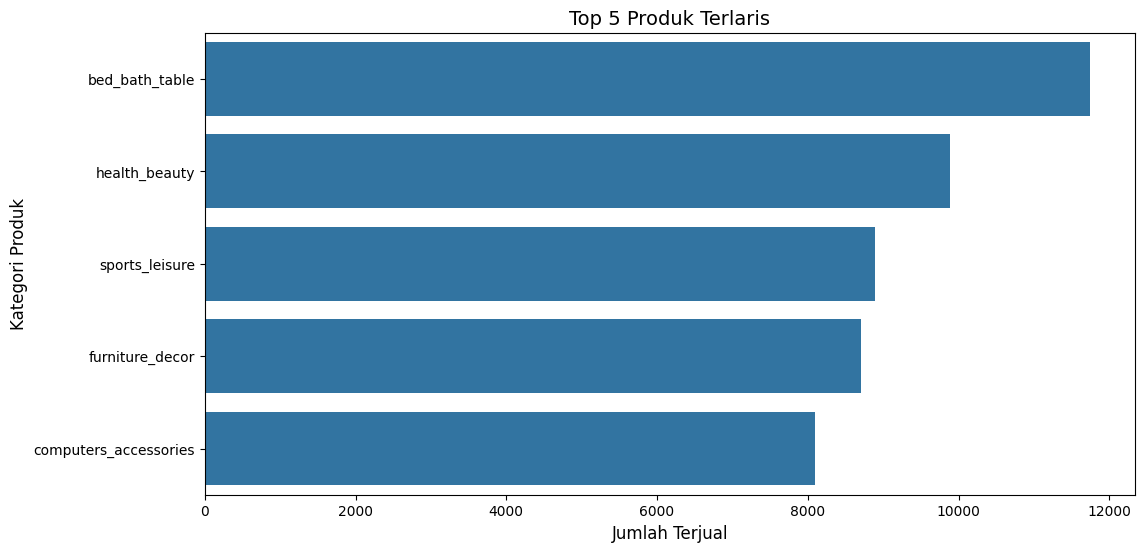

In [80]:
plt.figure(figsize=(12,6))
sns.barplot(x='total_sold', y='product_category_name_english', data=top_products.head(5))
plt.title("Top 5 Produk Terlaris", fontsize=14)
plt.xlabel("Jumlah Terjual", fontsize=12)
plt.ylabel("Kategori Produk", fontsize=12)
plt.show()

**Insight**
- Kategori bed_bath_table adalah produk paling laris dan meja memiliki permintaan tinggi.
- health_beauty berada di posisi kedua, menunjukkan bahwa produk perawatan diri juga sangat diminati.
- Sport_Leisure, Furniture_decor, dan Computers_accessories masuk dalam top 5 menandakan bahwa kategori tersebut juga cukup diminati


### Apa kategori produk dengan rata-rata ulasan terbaik & terburuk?

<ipython-input-81-1a42876e471e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_avg_sorted.values, y=review_avg_sorted.index, palette="Greens_r")


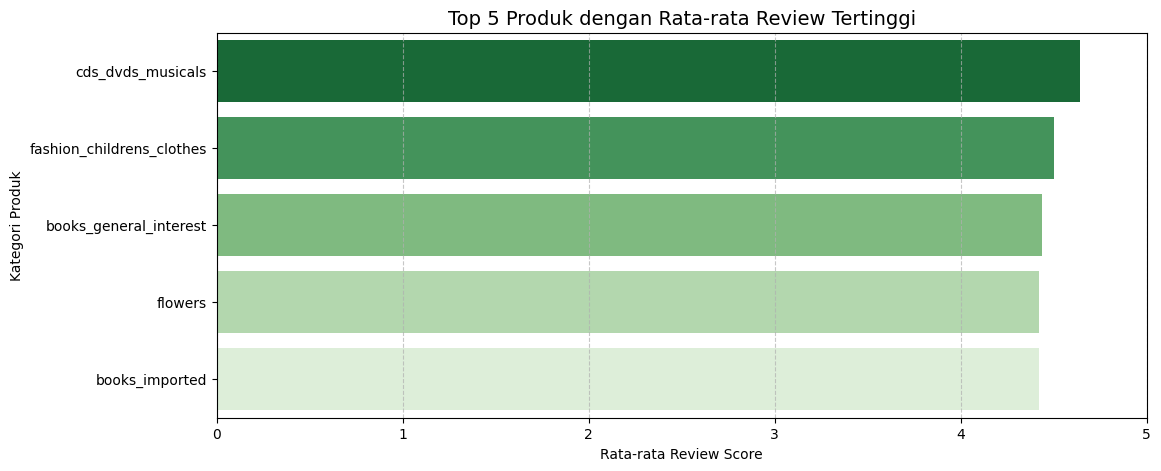

<ipython-input-81-1a42876e471e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_avg.head(top_n).values, y=review_avg.head(top_n).index, palette="Reds_r")


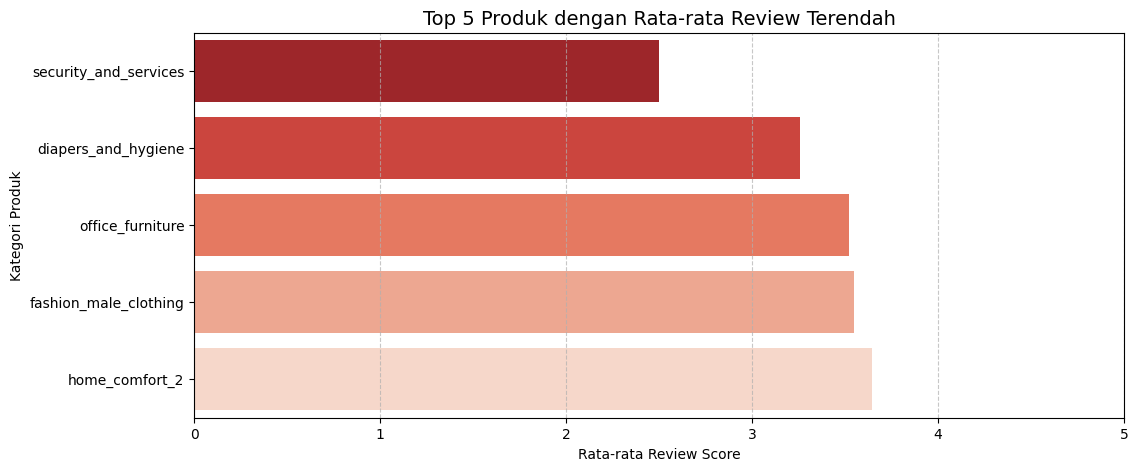

In [81]:
top_n = 5

# Plot kategori produk dengan ulasan terbaik
review_avg_sorted = review_avg.sort_values(ascending=False).head(top_n)
plt.figure(figsize=(12, 5))
sns.barplot(x=review_avg_sorted.values, y=review_avg_sorted.index, palette="Greens_r")
plt.title(f"Top {top_n} Produk dengan Rata-rata Review Tertinggi", fontsize=14)
plt.xlabel("Rata-rata Review Score")
plt.ylabel("Kategori Produk")
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Plot kategori produk dengan ulasan terburuk
plt.figure(figsize=(12, 5))
sns.barplot(x=review_avg.head(top_n).values, y=review_avg.head(top_n).index, palette="Reds_r")
plt.title(f"Top {top_n} Produk dengan Rata-rata Review Terendah", fontsize=14)
plt.xlabel("Rata-rata Review Score")
plt.ylabel("Kategori Produk")
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


**Insight**
- Kategori produk dengan ulasan terbaik
    - cds_dvds_musicals memiliki rata-rata review tertinggi
    - fashion_childrens_clothes
    - books_general_interest
    - flowers
    - books_imported
- Kategori produk dengan ulasan terendah
    - security_and_services memiliki rating terendah
    - diapers_and_hygiene
    - office_furniture
    - fashion_male_clothing
    - home_comfort_2


### Bagaimana tingkat kepuasan pelanggan terhadap transaksi di e-commerce?

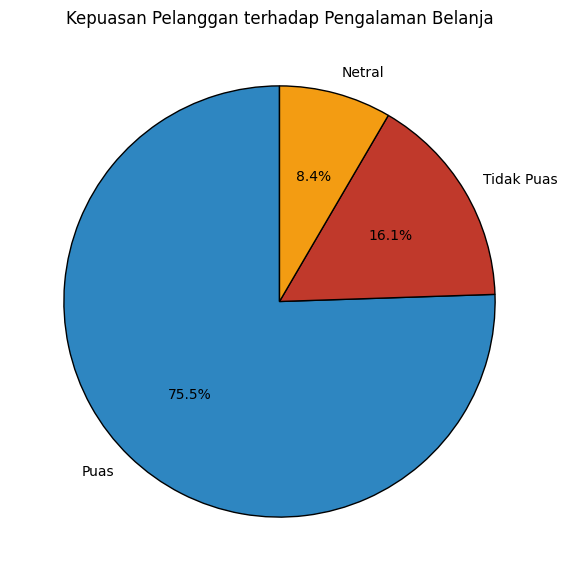

In [84]:
def categorize_satisfaction(score):
    if score in [1, 2]:
        return "Tidak Puas"
    elif score == 3:
        return "Netral"
    else:
        return "Puas"

df_merge['satisfaction_category'] = df_merge['review_score'].apply(categorize_satisfaction)
satisfaction_distribution = df_merge['satisfaction_category'].value_counts()



plt.figure(figsize=(7,7))
colors = ["#2E86C1", "#C0392B", "#F39C12"]
satisfaction_distribution.plot(kind="pie", autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Kepuasan Pelanggan terhadap Pengalaman Belanja")
plt.ylabel("")
plt.show()


**Insight:**
- Mayoritas pelanggan (75,5% ) puas dengan pengalaman belanja, menunjukkan kepuasan yang cukup tinggi terhadap layanan
- 16,1% pelanggan netral
- 8,4% pelanggan tidak puas, pengelola platform perlu mengevaluasi beberapa aspek


## Conclusion

- Kategori produk terlaris
    - Mempertahankan kategori terlaris dengan memberi banyak promo
    - Mendorong kategori yang tidak termasuk di top 5 dengan memperkuat pemasaran, paket bundling, atau cross-selling
- Kategori dengan ulasan terbaik dan terburuk
    - Kategori seperti buku, musik, dan pakaian anak-anak memiliki kepuasan pelanggan yang tinggi. Pemasaran kategori produk ini dapat ditingkatkan dan menjadikan kategori ini sebagai kategori unggulan
    - Kategori yang memiliki rating rendah perlu dievaluasi kembali dari keamanan pengiriman, kualitas produk, atau memberikan deskripsi produk yang lebih akurat agar pelanggan tidak merasa kecewa.
- Kepuasan pelanggan terhadap pengalaman belanja
    - Mayoritas pelanggan puas dengan pengalaman belanjanya, menunjukan bahwa platform e-commerce mampu memberikan pengalaman yang baik bagi pelanggan
    - Persentase pelanggan yang belum puas masih cukup tinggi, menandakan perlu analisis dan evaluasi kembail agar pelanggan bisa mendapatkan pengalaman belanja yang lebih baik
